# Exploring singlepoint

In [ ]:
# improts
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from glob import glob
import pickle
import shutil
import json
import io
import pandas as pd
import seaborn as sns
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
import py3Dmol


# For highlight colors
from matplotlib.colors import ColorConverter
import matplotlib.ticker as mticker

from ipywidgets import interact,fixed,IntSlider


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Utility functions from nitrogenase module
sys.path.insert(0, '/home/magstr/Documents/nitrogenase/niflheim_scripts/nitrogenase/backup_plot_diagram')
from data_handler import renamed_load, extract_scoring3,extract_scoring2, extract_scoring1
    
# Custom functions 
from my_utils.visualization import draw_generation,conf_viewer, natural_keys, atoi
from my_utils.classes import Generation, Conformers

#IPythonConsole.drawOptions.addAtomIndices = True
#IPythonConsole.molSize = 500,500
#IPythonConsole.drawOptions.addAtomIndices = True

font = {'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)


dft_base = Path('/home/magstr/dft_data')

HARTREE2EV = 27.2114
HARTREE2KCAL = 627.51
kcal = 627.51
ev = 27.2114

In [ ]:
m = Chem.MolFromSmiles('[1*]c1ccccc1')

In [ ]:
img = Chem.Draw.MolsToGridImage([m], useSVG=True)

In [ ]:
with open('benzene.svg','w') as f:
    f.write(img.data)

In [1]:
# Scoring function dict
funcs = {
        "rdkit_embed_scoring": extract_scoring1,
        "rdkit_embed_scoring_NH3toN2": extract_scoring2,
        "rdkit_embed_scoring_NH3plustoNH3": extract_scoring3,
    }

NameError: name 'extract_scoring1' is not defined

## Load the reference energies

In [2]:
(
        reactions_gfn1_corrected,
        reactions_gfn2_corrected,
        reactions_dft_ams_tzp,
        reactions_dft_orca_tzp,
        reactions_dft_orca_svp_tzp,
        reactions_dft_orca_sarcJ_tzp
    ) = get_energy_dicts()

NameError: name 'get_energy_dicts' is not defined

In [3]:
reactions_dft_orca_sarcJ_tzp

NameError: name 'reactions_dft_orca_sarcJ_tzp' is not defined

In [4]:
reactions_dft_orca_tzp

NameError: name 'reactions_dft_orca_tzp' is not defined

NH3 -> N2 : -11.0351 kcal/mol

NH3 -> N2_NH3 : -13.5287 kcal/mol

NH3+ -> NH3 : 18.2909 kcal/mol

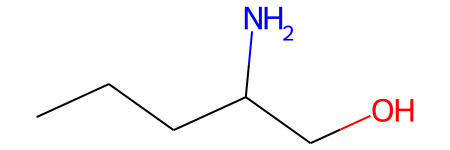

In [6]:
Chem.MolFromSmiles('CCCC(N)CO')

In [7]:
draw_generation('/home/magstr/dft_data/0_140_dft_opts/117/25_19/Mo_NH3/orca.xyz', trajectory=False, width = 900, height=700)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
draw_generation('check_start_struct/mo_nh3.xyz', trajectory=False, width = 900, height=700)
draw_generation('check_start_struct/xtbmol000.xyz', trajectory=False, width = 900, height=700)
draw_generation('check_start_struct/struct.xyz', trajectory=False, width = 900, height=700)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

-8802.338172878202
NH3plus= -8802.211808561091# GET THE SCORES FOR HIPT FROM CNOFORMER GENERATION

In [9]:
NH3 = -7131.022008056302
N2 = -7184.059350816685

In [19]:
def rdkit_embed_scoring_calc(N2_NH3, NH3):
    delta = N2_NH3 * kcal - (
        NH3 * kcal + reactions_dft_orca_sarcJ_tzp["N2"]
    )
    return delta


def rdkit_embed_scoring_NH3toN2_calc(N2, NH3):
    delta = (N2 * kcal + reactions_dft_orca_sarcJ_tzp["NH3"]) - (
        NH3 * kcal + reactions_dft_orca_sarcJ_tzp["N2"]
    )
    return delta


def rdkit_embed_scoring_NH3plustoNH3_calc(NH3plus, NH3):
    delta = (
        NH3 * kcal
        - NH3plus * kcal
        + reactions_dft_orca_sarcJ_tzp["delta_Cp"]
    )
    return delta

In [15]:
rdkit_embed_scoring_NH3toN2_calc(np.array([N2]), np.array([NH3]))

NameError: name 'N2' is not defined

In [16]:
NH3= -8802.339357016772
NH3plus= -8802.211808561091

In [17]:
rdkit_embed_scoring_NH3plustoNH3_calc(np.array([NH3plus]), np.array([NH3]))

array([18.48047123])

In [34]:
rdkit_embed_scoring_NH3plustoNH3_calc(np.array([NH3]), np.array([NH3plus]))

177.81908594164997






## XTB Mo-N bonds breaking

In [18]:
draw_generation('/home/magstr/generation_data/Conformers/conformers/debug_conformer10/033_007_Mo_NH3/conf024/xtbmol024.xyz', trajectory=False,width = 900, height=800)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
draw_generation('/home/magstr/generation_data/Conformers/conformers/debug_conformer8/011_043_Mo_N2_NH3/conf060/traj.xyz', trajectory=False)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Visualizing DFT opts

In [11]:
opt_dir = Path('/home/magstr/Documents/GB_GA/conformers_dft')

In [12]:
sorted(opt_dir.rglob('*struct.xyz'))

[PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/19_15/Mo_N2/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/19_15/Mo_NH3/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/29_44/Mo_N2/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/29_44/Mo_NH3/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/33_48/Mo_N2/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/33_48/Mo_NH3/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/38_5/Mo_N2/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/38_5/Mo_NH3/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second_conformers_dft/40_28/Mo_N2/struct.xyz'),
 PosixPath('/home/magstr/Documents/GB_GA/conformers_dft/second

In [13]:
# 38_5 reattatch
folder = 'second_conformers_dft'
idx = '29_44'

In [14]:
draw_generation(str(opt_dir / f'{folder}/{idx}/Mo_NH3/orca_trj.xyz'),height=500, width=600, trajectory=True)
draw_generation(str(opt_dir / f'{folder}/{idx}/Mo_NH3/orca.xyz'),height=500, width=600, trajectory=False)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [44]:
draw_generation(str(opt_dir / f'{folder}/{idx}/Mo_N2/orca_trj.xyz'),height=600, width=600, trajectory=True)
draw_generation(str(opt_dir / f'{folder}/{idx}/Mo_N2/orca.xyz'),height=600, width=600, trajectory=False)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Getting scores

### Look at logfiles to see XTB vs DFT conformer distribution

In [20]:
def read_properties_sp(logfile):
    """
    Read Singlepoint Energy
    """
    with logfile.open() as f:

        for line in f:
            if "FINAL SINGLE POINT ENERGY" in line:
                scf_energy = float(line.split()[4])
                break
            else:
                scf_energy = None

    return scf_energy
def atoi(text):
    return int(text) if text.isdigit() else text


def natural_keys(text):
    """
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    """
    return [atoi(c) for c in re.split(r"(\d+)", text)]

In [21]:
#idx ='33_7'
#mol = 0

#idx ='24_37'
#mol = 1

idx ='32_20'
mol = 2

In [22]:
with open("/home/magstr/Documents/GB_GA/debug/debug_all_scoring/Conformers.pkl", "rb") as f:
    conf = pickle.load(f)
logs = Path(f'/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/{idx}/Mo_NH3')

In [23]:
sorted(Path('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/').glob('*'))

[PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/24_37'),
 PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20'),
 PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/33_7')]

In [396]:
folders = sorted(logs.glob('*'))

In [397]:
folders

[PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf000'),
 PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf001'),
 PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf002'),
 PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf003'),
 PosixPath('/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf004')]

In [398]:
for elem in conf.molecules:
    print(elem.scoring_function,elem.idx)

rdkit_embed_scoring_NH3toN2 (33, 7)
rdkit_embed_scoring (24, 37)
rdkit_embed_scoring_NH3plustoNH3 (32, 20)


In [399]:
#l =[str(x) for x in sorted(logs.rglob('Mo*'))]
#l.sort(key=natural_keys)
#l = [Path(x) for x in l]
#l

In [401]:
top_conf_energies_xtb

array([-102.9699488 , -102.96810907, -102.94721563, -102.97702213])

In [404]:
conf.molecules[mol].energy_dict['energy1']

array([-102.62307394, -102.60874195, -102.62376069, -102.59730743,
       -102.60703909])

/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf000
/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf001
/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf002
/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf003
/home/magstr/Documents/GB_GA/debug/debug_all_scoring/logfiles/32_20/Mo_NH3/conf004


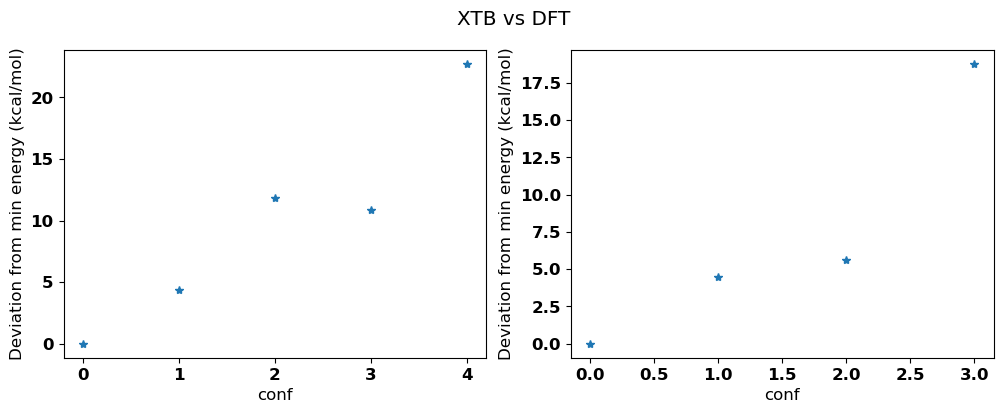

In [400]:
top_conf_energies_xtb = conf.molecules[mol].energy_dict['energy2']
top_conf_energies_xtb_sorted = np.sort(conf.molecules[mol].energy_dict['energy2'])

confs = [c for _, c in sorted(zip(top_conf_energies_xtb, conf.molecules[mol].optimized_mol2.GetConformers()))]

xtb_list = [(x - np.min(top_conf_energies_xtb))*630 for x in top_conf_energies_xtb_sorted][0:10]

orca_ens = []
for elem in folders:
    print(elem)
    en = read_properties_sp(elem/'orca.out')
    if en:
        orca_ens.append(en*630)
    else:
        orca_ens.append(np.nan)np.nan
tmp = [x - np.nanmin(orca_ens) for x in orca_ens]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig.suptitle('XTB vs DFT')
ax[0].set(ylabel='Deviation from min energy (kcal/mol)',xlabel='conf')
ax[0].plot(tmp, '*')
ax[1].plot(xtb_list, '*')
ax[1].set(ylabel='Deviation from min energy (kcal/mol)',xlabel='conf');

# Looking at ORCA dft optimization output files

In [36]:
def rdkit_embed_scoring_calc_opt(arr):
    N2_NH3 = arr["Mo_N2_NH3"]
    NH3 = arr["Mo_NH3"]
    delta = N2_NH3 * kcal - (
        NH3 * kcal + reactions_dft_orca_sarcJ_tzp["N2"]
    )
    return delta


def rdkit_embed_scoring_NH3toN2_calc_opt(arr):
    N2 = arr["Mo_N2"]
    NH3 = arr["Mo_NH3"]
    delta = (N2 * kcal + reactions_dft_orca_sarcJ_tzp["NH3"]) - (
        NH3 * kcal + reactions_dft_orca_sarcJ_tzp["N2"]
    )
    return delta


def rdkit_embed_scoring_NH3plustoNH3_calc_opt(arr):
    NH3plus = arr["Mo_NH3+"]
    NH3 = arr["Mo_NH3"]
    delta = (
        NH3 * kcal
        - NH3plus * kcal
        + reactions_dft_orca_sarcJ_tzp["delta_Cp"]
    )
    return delta

In [37]:
def read_energy_opt_orca(logfile=None):

    re_energy = re.compile("(-\\d+\\.\\d+)")
    energy = []
    with logfile.open() as f:
        for line in f:
            if "FINAL SINGLE POINT" in line:
                energy.append(float(re_energy.search(line).groups()[0]))
    return energy


In [38]:
def get_opts():
    folder = Path('/home/magstr/dft_data/top10_opts/logfiles')
    f = sorted(folder.glob('*'))
    for elem in f:
        files = sorted(elem.rglob('orca.out'))
        for file in files:
            en = read_energy_opt_orca(file)
            print(en)
    return en

In [43]:
# paths
p_n2 = Path('/home/magstr/dft_data/top10_opts/logfiles/41_5/Mo_N2/orca.out')
p_nh3 = Path('/home/magstr/dft_data/top10_opts/logfiles/41_5/Mo_NH3/orca.out')

n2 = read_energy_opt_orca(p_n2)
nh3 = read_energy_opt_orca(p_nh3)

In [45]:
draw_generation('/home/magstr/dft_data/top10_opts/logfiles/12_8/Mo_NH3/orca_trj.xyz', trajectory=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol